In [1]:
%load_ext autoreload
%autoreload 2    

In [2]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(0, '../')

In [379]:
from lv.base.basegrid import BaseGrid

In [417]:
b = BaseGrid("B")

In [418]:
b.load_grid()

(2204,) (5760, 2204) (5760, 5)


In [419]:
b.prepare()

#220 R=1000.00
Building RBF on flux shape (5760, 220)
[1.9403e+02 1.4640e+01 5.7500e+00 1.8700e+00 9.3000e-01 7.3000e-01
 6.0000e-01 3.4000e-01 2.4000e-01 1.7000e-01]


In [420]:
pmt = b.test["pmt"]

In [475]:
obsflux, obsvar = b.getObs(pmt, 10, normlog=0)
flux0 = b.getModel(pmt, normlog=0)


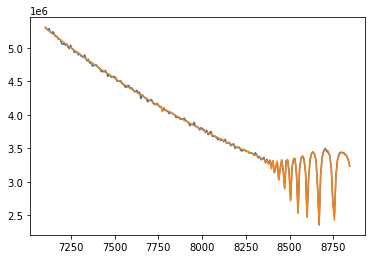

In [476]:
plt.plot(wave, obsflux)
plt.plot(wave, flux0)

Fitting with Template T8500G25Mm20Ap03Cp00
estimate 7969.15078163147


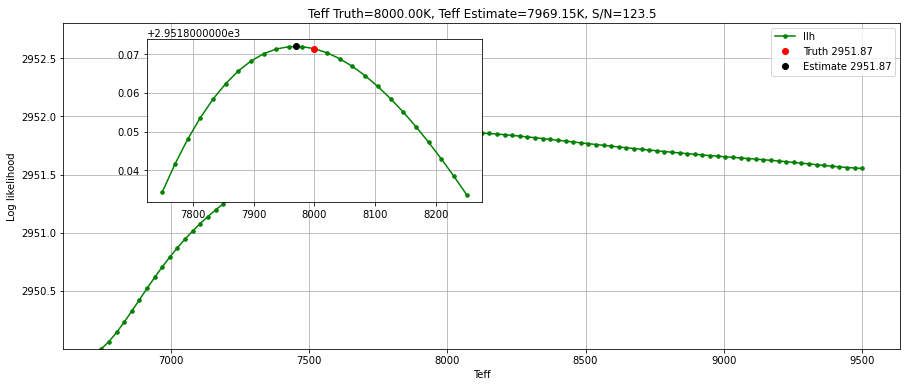

In [477]:
x=8000
temp_pmt = [-2.0, 8500, 2.5, 0.0, 0.25]
_=b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="T")

Fitting with Template T8000G25Mm20Ap03Cp00
estimate 7715.099632740021


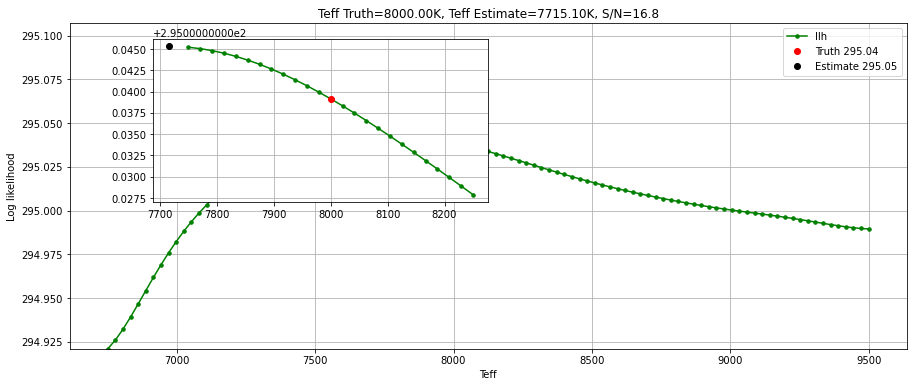

In [471]:
x=8000
temp_pmt = [-2.0, 8000, 2.5, 0.0, 0.25]
_=b.eval_pmt_on_axis(temp_pmt, x, obsflux, obsvar, axis="T")

In [449]:
b.fn(20000)

-0.007534040225142639

In [446]:
b.fn(8000)

-0.0075343233953136185

In [479]:
pvals, obsfluxs, obsvars = b.RBF_generator(10, 1)

-2.5 -1.5
6750.0 9500.0
2.0 3.5
-0.75 0.5
-0.25 0.5


In [486]:
b.eigv.shape

(10, 220)

In [487]:
obsCoeff = obsfluxs.dot(b.eigv.T)

In [488]:
obsCoeff.shape

(10, 10)

In [507]:
from lv.dnn.dnn_LLH import DNN_LLH

In [511]:
from lv.dnn.baseDNN import BaseDNN

In [512]:
bd = BaseDNN()

In [513]:
bd.dRs

{'M': [[-2.5, 0.0], [3500, 5000], [0.0, 1.5], [-0.75, 0.5], [-0.25, 0.5]],
 'W': [[-2.0, 0.0], [5500, 7500], [3.5, 5.0], [-0.75, 0.5], [-0.25, 0.5]],
 'C': [[-2.0, 0.0], [3750, 5500], [3.5, 5.0], [-0.75, 0.5], [-0.25, 0.5]],
 'B': [[-2.5, -1.5], [6750, 9500], [2.0, 3.5], [-0.75, 0.5], [-0.25, 0.5]],
 'R': [[-1.0, 0.0], [5500, 6750], [2.0, 3.5], [-0.75, 0.5], [-0.25, 0.5]],
 'G': [[-2.5, -1.0], [4000, 5500], [1.5, 3.5], [-0.75, 0.5], [-0.25, 0.5]]}

In [509]:
d.dRs =a


AttributeError: 'DNN_LLH' object has no attribute 'dRs'

In [519]:
d = DNN_LLH()

Num GPUs Available:  0


[autoreload of lv.dnn.dnn_LLH failed: Traceback (most recent call last):
  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/IPython/ex

TypeError: __init__() missing 1 required positional argument: 'R'

In [517]:
d.prepare_DNN(input_dim = 10, lr=0.03, dp=0.1)

Layers: [10, 64, 32, 16, 2]


In [504]:
x_train=obsCoeff
y_train=d.scale(pvals[:, d.pdx],"B")

AttributeError: 'DNN_LLH' object has no attribute 'pMins'

In [502]:
y_train

array([[8.49650754e+03, 2.03976697e+00],
       [6.87458603e+03, 2.87866337e+00],
       [7.78018469e+03, 3.41034536e+00],
       [8.47111477e+03, 2.86321127e+00],
       [8.13362471e+03, 2.58225489e+00],
       [9.10534706e+03, 2.96493233e+00],
       [8.56140749e+03, 2.68737934e+00],
       [7.19806967e+03, 2.81842518e+00],
       [6.94406406e+03, 3.41219721e+00],
       [8.51665302e+03, 2.57915396e+00]])

In [ ]:
d.test(obs)